<a href="https://colab.research.google.com/github/usharmaVNIT/4th-Year-Project/blob/main/4th_Year_Project_ML_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Data

In [1]:
import pandas as pd
import numpy as np

# Reading feature vector from file
raw_data = pd.read_csv('input_final.csv')
raw_data.columns = ["F"+str(i) for i in range(1, len(raw_data.columns) + 1)]
# raw_data = raw_data.sample(frac=1)
print(raw_data.head())
# Pre-processing the data
features = raw_data.copy()
features = features.iloc[:,:-1]
labels = raw_data.iloc[:,-1:]

print(features.head())
print(labels.head())

features = np.array(features)
print(features)
labels = np.array(labels)


           F1         F2         F3  ...         F79         F80  F81
0  117.022451  95.567316  77.702550  ...  563.138096  372.219223    1
1   40.962661  38.385066  32.198439  ...   66.484803   63.115706    1
2   42.924978  39.831538  34.121057  ...   63.761359   52.928770    1
3   36.683007  36.746411  30.111912  ...   57.602285   56.224384    1
4   38.713092  35.626802  30.483209  ...   57.926560   57.894936    1

[5 rows x 81 columns]
           F1         F2         F3  ...        F78         F79         F80
0  117.022451  95.567316  77.702550  ...  73.861975  563.138096  372.219223
1   40.962661  38.385066  32.198439  ...   9.607606   66.484803   63.115706
2   42.924978  39.831538  34.121057  ...  11.482237   63.761359   52.928770
3   36.683007  36.746411  30.111912  ...   6.235513   57.602285   56.224384
4   38.713092  35.626802  30.483209  ...   8.840690   57.926560   57.894936

[5 rows x 80 columns]
   F81
0    1
1    1
2    1
3    1
4    1
[[117.02245146  95.56731638  77.7025

#Train-Test

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=42)

# Decision Tree

##Normal Decision Tree

In [3]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

###Accuracy of normal Decision Tree

In [4]:
from sklearn.metrics import accuracy_score
pred = clf.predict(X_test)
score = accuracy_score(y_test, pred)
str(score*100)+' %'

'71.42857142857143 %'

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


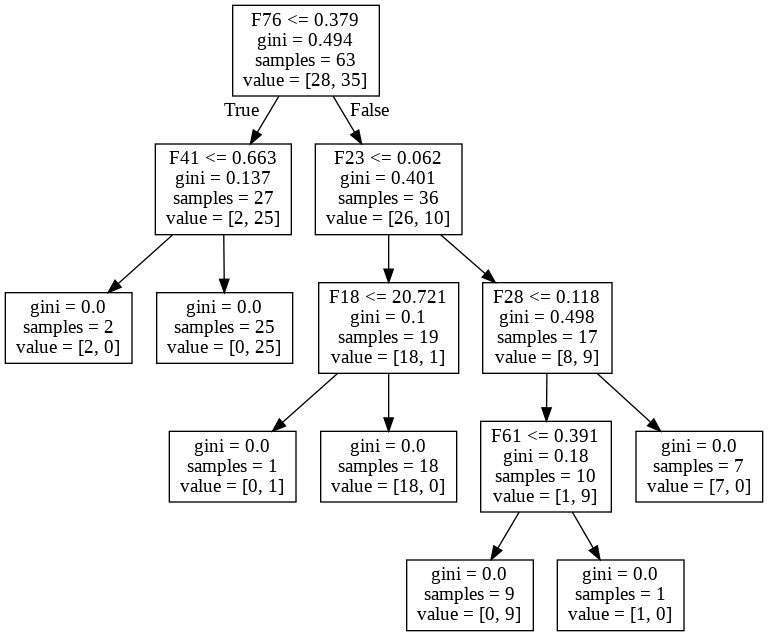

In [5]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

dot_data = StringIO()  
fname = raw_data.columns[:-1]
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=fname)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  


## Random Tree Forest
### More Effective

In [6]:
from sklearn.ensemble import RandomForestClassifier
random_clf = RandomForestClassifier(n_estimators=500)
random_clf = random_clf.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


###Accuracy of Random Treee Forest

In [7]:
pred = random_clf.predict(X_test)
score = accuracy_score(y_test, pred)
str(score*100)+' %'

'85.71428571428571 %'

#K-Means Clustering

##Training K-Means with 2 clusters

In [8]:
%matplotlib inline

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random, float


kmeans = KMeans(n_clusters=2)

scaledFeatures = scale(features)

kmeans = kmeans.fit(scaledFeatures)



##Finding the majority cluster and assigning it as false

In [9]:
cnt = 0
for e in kmeans.labels_:
  if e == 0:
    cnt-=1
  else:
    cnt+=1
d = {}
newLabels = []
if cnt<0:
  # newlabels = 1-labels
  for e in labels:
    if e == 0:
      newLabels.append(0)
    else:
      newLabels.append(1)
else:
  for e in labels:
    if e == 0:
      newLabels.append(1)
    else:
      newLabels.append(0)
newLabels = np.array(newLabels)

##Calculating the accuracy of K-Means

In [10]:
score = accuracy_score(newLabels, kmeans.labels_)
str(score*100)+' %'

'45.714285714285715 %'